### WELCOME TO OUR ML-EXPLORATION & TUTORIAL! 

TITLE: Music on The Mental

CLASS: Fall 2024 Data Science Project

BY: Eric Hay, Eyal Arkin, Joseph Ettinger

CONTRIBUTIONS (BASED ON THE GIVEN STEPS): 

[***PART A, Project Idea - Joseph Ettinger***] The first step in the process was generating an idea. As someone with Obsessive-Compulsive Disorder and a deep love for music, I was struck by the idea of exploring the relationship between the two after coming across a really interesting dataset on Kaggle. After all, listening to music daily as much as I do must have some effect on my mental health, right? If so, to what extent does it impact me? Which genres resonate most with my mind? There was so much to uncover. Since this topic resonates deeply with everyone on some level, my teammates were excited to jump on board. 

[***PART B, Dataset Curation & Preprocessing - Eric Hay, Eyal Arkin, & Joseph Ettinger***] The aforementioned dataset became the foundation of our project. It included all the necessary features and data points to explore potential relationships and, ultimately, train a more advanced machine learning model. Our first step was importing the dataset, followed by applying various cleaning techniques to preprocess the data before diving into exploration. 

[***PART C, Data Exploration & Summary Statistics - Eric Hay & Eyal Arkin***] Next, we conducted initial explorations of the data. This step was crucial to uncovering potential relationships, identifying assumptions that might not hold true, and gaining a better understanding of the dataset. These early discoveries and summary statistics enabled us to focus on a more detailed and sophisticated analysis of the data, one that leveraged machine learning techniques. 

[***PART D, ML Algorithm Design/Development - Eric Hay, Eyal Arkin, & Joseph Ettinger***] Before we could start using machine learning models, we first needed to determine what type of model to use, why it was the best fit, and how we would implement it. This stage required deep collaboration as we worked through a variety of critical questions and developed our algorithm. For instance, was this a classification problem? If so, what implications would that have for feature engineering? Would we need to convert quantitative data into categorical data to make it compatible with a decision tree? And, most importantly, was a decision tree even the best approach? These are just a few of the many questions we tackled. Ultimately, this stage was all about gathering the necessary information, strategizing, and conducting feature engineering before taking action...much like aiming before taking the shot. 

[***PART E, ML Algorithm Training & Test Data Analysis - Eric Hay & Eyal Arkin***] Once our data was fully prepared with the selected features and our procedure was finalized, it was time to train the model. We utilized various Python libraries, tools, and functions to train and test the data, fully immersing ourselves in the machine learning process. Throughout this phase, we continually questioned our approach: Were we at risk of overfitting, and how could we address it? Were we focusing on the right features? Doubt is natural in such a complex process, but we found that the deeper we explored, the more valuable insights we uncovered. 

[***PART F, Visualization, Result Analysis, Conclusion - Eric Hay, Eyal Arkin, & Joseph Ettinger***] Once our model was trained, we could apply it, visualize the results, and draw conclusions from our findings. This was, without a doubt, the most meaningful part of the process, as it allowed us to uncover insights and find purpose in the work we were doing. Whether the results supported our original hypothesis or contradicted it, they always led us to valuable discoveries. That’s the beauty of working with machine learning—you might not always get the outcomes you expect, but you’ll always uncover insights that deepen your understanding and guide you toward further exploration. 

[***PART G, Visualization, Result Analysis, Conclusion - Joseph Ettinger***] After completing our work, we created this final tutorial. While the goal of machine learning is to uncover insights about a topic, its true value lies in effectively sharing those insights with others. If the findings can’t be communicated clearly, concisely, and elegantly, the impact of the research is greatly diminished. Machine learning helps us discover meaning, but it’s the researcher’s responsibility to make that knowledge accessible and actionable for others.

### Introduction

![Music and mental health meme](320_MEME.png)


Music has long been recognized as a powerful force in shaping emotions, focus, and mental well-being. For me, as someone with Obsessive-Compulsive Disorder (OCD), this connection felt especially personal, sparking the idea to explore how music might influence mental health. Could my daily engagement with music be affecting my mental health? If so, how? Which genres might resonate most with my brain? These questions formed the foundation of this project. However, my personal connection to the topic wasn’t the only driving force. My teammates, each with their own unique relationships to music and mental health, quickly saw the value in this exploration. They, too, recognized the potential for broader relevance. We came to realize that music’s effect on mental health isn’t just an individual experience but a universally relevant topic.

Our goal, therefore, was to leverage machine learning to uncover insights into how music may influence mental health, hoping to provide a clearer understanding of this dynamic relationship. Mental health affects us all, and music is something that universally connects us. By analyzing data, we aimed to uncover patterns that could contribute to more personalized approaches to self-care or therapeutic interventions.

The process was both technical and exploratory. We moved through data preparation, feature engineering, and model training with the goal of answering key questions with clarity and precision. Our work emphasizes not only the discovery of insights but also the importance of communicating those findings in an accessible and meaningful way.

This tutorial represents the culmination of our project, detailing the methods we employed and the insights we gained. Through sharing our approach, we hope to encourage others to explore similar intersections of data science and human experience, showing how machine learning can help tackle universally relevant questions.

### Data Curation

DATASOURCE: Kaggle 

TITLE: Mental Health & Music Relationship Analysis & EDA

LINK: https://www.kaggle.com/code/melissamonfared/mental-health-music-relationship-analysis-eda

Our dataset, sourced from Kaggle, focuses on exploring the relationship between mental health and music preferences. It includes fields such as age, primary streaming service, hours of music consumption per day, favorite genre, whether the individual listens while working, and so much more! Additionally, it gathers details about musical background, such as whether the person plays an instrument or composes music. This diverse set of features allows for a comprehensive analysis of how music habits and preferences correlate with mental well-being. By curating this dataset, we aimed to ensure it provided meaningful insights while offering enough variability to support our exploration and machine learning efforts.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats # same as from scipy import stats
from collections import defaultdict

df = pd.read_csv('mxmh_survey_results.csv')
# Converting the Date to a datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# converting Age to an int type
df['Age'] = df['Age'].fillna(0).astype(int)
df['Music effects'] = df['Music effects'].fillna('No effect') # The ASSUMPTION is no effect if it is an NaN value
# Eliminate entries where Hours per Day >= 20 as we assume these are unreliable/fake entries
df = df[df['Hours per day'] < 20]
df = df.drop('Permissions', axis=1)
df = df.rename(columns={
    'Frequency [Classical]': 'Classical',
    'Frequency [Country]': 'Country',
    'Frequency [EDM]': 'EDM',
    'Frequency [Folk]': 'Folk', 
    'Frequency [Gospel]': 'Gospel' ,
    'Frequency [Hip hop]': 'Hip hop' ,
    'Frequency [Jazz]': 'Jazz' ,
    'Frequency [K pop]': 'K pop',
    'Frequency [Latin]': 'Latin' ,
    'Frequency [Lofi]' : 'Lofi',
    'Frequency [Metal]' : 'Metal',
    'Frequency [Pop]' : 'Pop',
    'Frequency [R&B]' : 'R&B',
    'Frequency [Rap]' : 'Rap',
    'Frequency [Rock]' : 'Rock',
    'Frequency [Video game music]' : 'Video game music'
})
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Pop,R&B,Rap,Rock,Video game music,Anxiety,Depression,Insomnia,OCD,Music effects
0,2022-08-27 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect
1,2022-08-27 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect
2,2022-08-27 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,2022-08-27 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,2022-08-27 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-10-30 14:37:28,17,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,2022-11-01 22:26:42,18,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,2022-11-03 23:24:38,19,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,2022-11-04 17:31:47,19,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


### Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) serves as a critical step in any data-driven project, as it helps us uncover patterns, identify relationships, and validate assumptions before diving into more complex analyses. After curating our dataset, performing EDA allows us to gain a deeper understanding of the data's structure, distributions, and potential anomalies. By summarizing key statistics, visualizing relationships, and investigating correlations between variables, we can pinpoint trends that might inform our study and refine our approach. In this project, EDA is particularly essential for uncovering connections between music habits and mental health, setting the foundation for robust insights and further machine learning applications.

### EDA Conclusion 1

We explored the relationship between the number of hours spent listening to music per day and the reported levels of depression. Our analysis revealed a negligible positive correlation between these variables, as indicated by a correlation coefficient of approximately 0.14. This result was somewhat unexpected, as we initially hypothesized a slight negative correlation—assuming that listening to more music might help alleviate poor mental health. However, the data suggests otherwise, challenging our assumption and emphasizing the complexity of this relationship.

Correlation Coefficient = ~0.14


The correlation coefficient between the "Hours per day" and "Depression" is: 0.14093364959351967


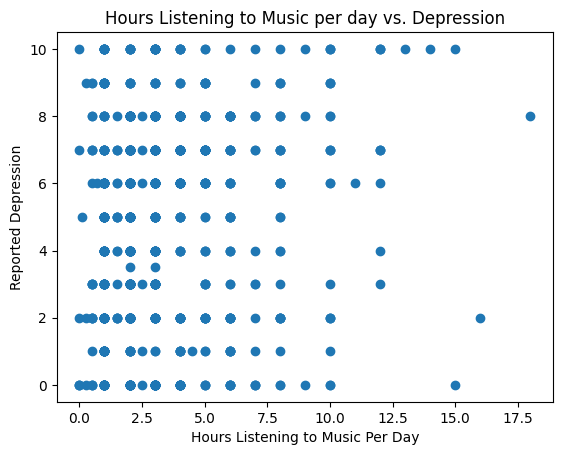

In [21]:

# Correlation coefficient to see how hours listening to music per day and depression may be linked
correlation = df['Hours per day'].corr(df['Depression'])
print(f'The correlation coefficient between the "Hours per day" and "Depression" is: {correlation}')

plt.scatter(df['Hours per day'], df['Depression'])
plt.xlabel("Hours Listening to Music Per Day")
plt.ylabel("Reported Depression")
plt.title("Hours Listening to Music per day vs. Depression")
plt.show()


### EDA Conclusion 2

Here, we ran a hypothesis test on the data.

**Null Hypothesis**: There is no correlation between genre of music and effect on listener's mental health.

**Alternate Hypothesis**: There is a correlation between genre of music and its effect on the listener's mental health.

After creating a contingency table and running a Chi<sup>2</sup> Test, we determined that the p value of such a test was ~6.476e<sup>-6</sup> which is approximately 0.01. As a result of such a low p-value, it is fair to reject the null hypothesis and conclude that there is some correlation between genre of music and effect on listener's mental health. Below, we have displayed a graph showing the respondent's selected genre of music on the x-axis, with the y-axis representing the count of respondents who replied either `Improve`, `No effect`, or `Worsen`


P Value of Chi2 Test: 0.13543929396947083


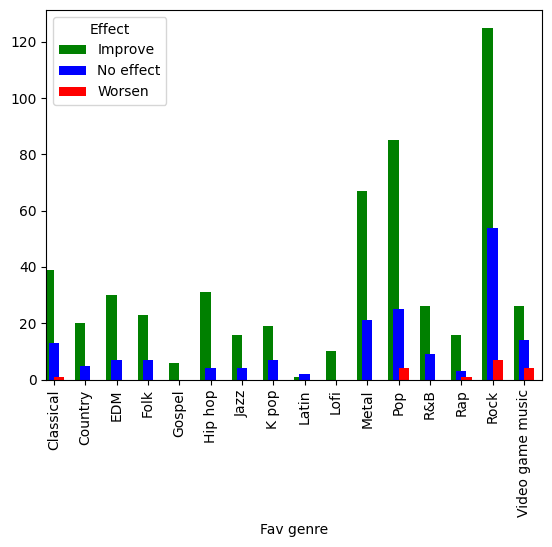

In [22]:
cont_table = pd.crosstab(df['Fav genre'], df['Music effects'])

chi2, p, dof, expected = stats.chi2_contingency(cont_table)
print(f'P Value of Chi2 Test: {p}')

cont_table['Improve'].plot(kind='bar', color='green', position=1, width=0.33, label='Improve')
cont_table['No effect'].plot(kind='bar', color='blue', position=0.5, width=0.33, label='No effect')
cont_table['Worsen'].plot(kind='bar', color='red', position=0, width=0.33, label='Worsen')
plt.legend(title='Effect', labels=['Improve', 'No effect', 'Worsen'])

plt.show()

### EDA Conclusion 3

For this part of our exploration we will be pursuing an interest in the relationship between THE EFFECT THAT MUSIC HAS ONE'S MENTAL HEALTH AND THAT INDIVIDUAL'S DEGREE OF OCD SEVERITY...This is an interesting area of exploration because OCD is a disorder that varies tremendously in terms of severity and so learning about the relationship between these different types of individuals and how they react to music is very fascinating.

**Null Hypothesis**: There is NO STATISTICALLY SIGNIFICANT RELATIONSHIP between the effect of music on one's mental health and the severity of one's OCD.

**Alternate Hypothesis**: There is A STATISTICALLY SIGNIFCANT RELATIONSHIP between the effect of music on one's mental health and the severity of one's OCD.

We decided on an ANOVA test to determine whether or not to reject the null hypothesis with a sigificance level of 0.05

0.2069826850082568


/var/folders/j7/9mngdvyx3g99908qk0bwll4r0000gn/T/ipykernel_32329/3871073532.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([improve['OCD'], none['OCD'], worsen['OCD']], labels=['Improve', 'No effect', 'Worsen'])


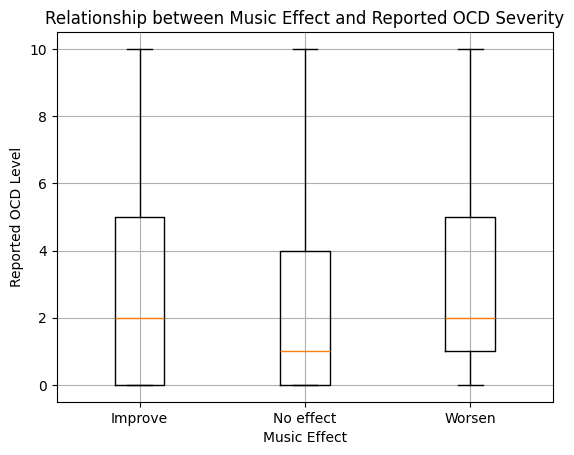

In [23]:
grouped = df.groupby('Music effects')
improve = grouped.get_group('Improve')
none = grouped.get_group('No effect')
worsen = grouped.get_group('Worsen')

result = stats.f_oneway(improve['OCD'], none['OCD'], worsen['OCD'])
print(result.pvalue)

plt.boxplot([improve['OCD'], none['OCD'], worsen['OCD']], labels=['Improve', 'No effect', 'Worsen'])
plt.xlabel('Music Effect')
plt.ylabel('Reported OCD Level')
plt.title('Relationship between Music Effect and Reported OCD Severity')
plt.grid(True)

plt.show()

### Feature Engineering



The ultimate goal of this project is to explore how music can positively impact mental health. Following our exploratory analysis, we determined that the best approach would be to design a system capable of analyzing an individual's mental health profile and recommending specific music genres that could improve their well-being. To achieve this, we focused on feature engineering to transform our dataset into a format suitable for training a machine learning model, ensuring it could accurately identify and suggest the most beneficial genres.

We decided that the best approach for our recommendation system was to use a Decision Tree Classifier model. One major challenge we aimed to address was overfitting, which could arise due to the wide range of values in the mental health features, scaled from 1.0 to 10.0. To mitigate this, we categorized these features into three groups: low, medium, and high, represented numerically as 0, 1, and 2. This transformation was handled by our `categorize_health` function. 

Additionally, we set a maximum depth of 5 for the decision tree to further reduce the risk of overfitting. We also standardized the "Frequency ['genre']" features by converting them into a scale from 0 to 3, where 'Never' is 0, 'Rarely' is 1, 'Sometimes' is 2, and 'Very frequently' is 3. This categorization was implemented using our `categorize_frequency` function. These preprocessing steps ensured the model was better equipped to generalize and provide meaningful recommendations.

To ensure our model focuses solely on the most relevant data, we limited its inputs to genre frequencies and mental health levels. By dropping all other columns, we eliminated potential noise and distractions, allowing the model to concentrate exclusively on the features that directly impact its predictions. This streamlined approach helps improve the model's accuracy and interpretability.

All of these preprocessing steps are encapsulated within the `prepare_data` function, which takes in our dataset and converts it into the proper format. This function streamlines the entire process, ensuring the data is ready for training and optimized for accurate model performance.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

def categorize_health(num):
        if num >= 0 and num < 4:
            return '0'
        elif num >= 4 and num < 7:
            return '1'
        elif num >= 7 and num <= 10:
            return '2'
        else:
            return 'invalid'

def categorize_frequency(frequency):
    match frequency:
        case 'Never':
            return 0
        case 'Rarely':
            return 1
        case 'Sometimes':
            return 2
        case 'Very frequently':
            return 3
        case _:
            return 'invalid'

df = df.drop(columns=['Timestamp', 'Age', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory','Foreign languages', 'BPM'])

health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
genre_columns = list(df.columns.drop(health_columns).drop('Music effects'))

def prepare_data(df):
    
    for col in health_columns:
        df[col] = df[col].apply(categorize_health)
    
    for col in genre_columns:
        df[col] = df[col].apply(categorize_frequency)
    

    return df

# new_df = prepare_data(df)
# new_df

The next section of code introduces a robust framework for evaluating and recommending music genres based on their effectiveness in improving mental health, perfectly aligning with the goals of our project. By leveraging two primary functions—`calculate_genre_effectiveness` and `target_genre`—this script helps us translate listening habits and outcomes into actionable recommendations.

### The Role of `calculate_genre_effectiveness`
The `calculate_genre_effectiveness` function systematically evaluates how impactful each genre is in improving mental health by analyzing listening frequencies and self-reported outcomes. Here’s how it operates:
1. **Setting Up Metrics:** A dictionary, `genre_scores`, is initialized to track two key metrics for each genre: the total frequency of listening and the frequency specifically associated with reported mental health improvements.
2. **Iterative Processing:** The function iterates through each row of the dataset, adding listening frequencies to the appropriate counters whenever the individual reports that music "Improved" their mental health.
3. **Effectiveness Ratio:** After processing the data, it calculates an effectiveness ratio for each genre by dividing the "improved" frequency by the total frequency. This ratio quantifies how likely a genre is to contribute to positive mental health outcomes.

This function is crucial because it transforms raw data into quantifiable measures of genre effectiveness, providing a solid foundation for data-driven recommendations.

### The Role of `target_genre`
The `target_genre` function builds on the effectiveness scores by determining the best genre recommendation for a specific individual. Here’s a breakdown:
1. **Initial Filter:** If the individual’s data does not indicate that music improves their mental health, the function immediately returns `None` since no recommendation is relevant.
2. **Calculating Scores:** For each genre, the function calculates a "total effectiveness score" by multiplying the individual’s listening frequency by the effectiveness score of the genre. This ensures the recommendation reflects both personal listening habits and broader trends.
3. **Selecting the Best Genre:** The function identifies the genre with the highest total effectiveness score, providing a tailored recommendation for the individual.

This function personalizes the insights generated by the first function, offering recommendations that balance individual preferences with effectiveness data.

### Relevance to the Project
These functions are central to our goal of linking music to mental health improvement. The `calculate_genre_effectiveness` function allows us to determine which genres have the most positive impact on mental health across the dataset, while `target_genre` customizes this information for each person. Together, they enable us to go beyond general observations and deliver personalized suggestions.

### Practical Applications and Insights
When applied to our dataset, this approach allows us to identify which genres, such as jazz, classical, or rock, have the highest likelihood of improving mental health. For example, if the data shows that classical music frequently correlates with positive mental health outcomes, it would be recommended to individuals who listen to it often.

Ultimately, these functions exemplify how we blend statistical rigor with practical application, creating a tool that leverages data to personalize mental health improvements through music. This methodology not only deepens our understanding but also provides a meaningful way to help individuals through music-based interventions.

In [25]:
def calculate_genre_effectiveness(df, genre_columns):
    genre_scores = {}
    for col in genre_columns:
        genre_scores[col] = {'improved': 0, 'total': 0}
    
    for row in df.iloc:
        for col in genre_columns:
            frequency = row[col]
            
            if row['Music effects'] == 'Improve':
                genre_scores[col]['improved'] += frequency
            genre_scores[col]['total'] += frequency
    
    # Calculate effectiveness ratio for each genre
    effectiveness_scores = {}
    for genre, scores in genre_scores.items():
        effectiveness_scores[genre] = max(0, scores['improved'] / scores['total'])
            
    return effectiveness_scores

def target_genre(row, genre_columns, genre_effectiveness):
    if row['Music effects'] != 'Improve':
        return None
    
    # Calculate a score for each genre combining frequency and effectiveness
    best_genre = None
    best_effectiveness = 0
    for col in genre_columns:
        frequency = row[col]
        g_effectiveness = genre_effectiveness[col]
        total_effectiveness = frequency * g_effectiveness
        # print(col)
        # print(frequency)
        # print(g_effectiveness)

        if (total_effectiveness > best_effectiveness) or best_genre == None:
            best_genre = col
            best_effectiveness = total_effectiveness
    return best_genre

# e = calculate_genre_effectiveness(new_df, genre_columns)
# print(target_genre(new_df.iloc[6], genre_columns, e))

### Primary Analysis

The next code section represents the core of our machine learning analysis, transforming exploratory insights into a functional recommendation system. By using a Decision Tree Classifier, the script predicts the music genres most likely to improve an individual's mental health based on their profile. Here's a breakdown of the process:

### Context and Approach
We chose classification for this task to categorize individuals into specific genres that could improve their mental health. A Decision Tree Classifier was selected for its simplicity and interpretability, making it ideal for linking mental health metrics to genre recommendations.

### Key Steps In Using A Recommender
1. **Data Preparation:** The `prepare_data` function preprocesses the dataset, ensuring it is clean and standardized for analysis.
2. **Genre Effectiveness Scores:** Using `calculate_genre_effectiveness`, we compute the impact of each genre on mental health, forming the foundation for recommendations.
3. **Target Variable Creation:** The `target_genre` function identifies the genre most likely to improve mental health for each individual, with non-applicable rows removed to ensure data quality.
4. **Feature and Target Sets:** Mental health metrics (`Anxiety`, `Depression`, etc.) are used as features (`X`), while the target variable (`y`) represents the recommended genre.
5. **Data Encoding and Splitting:** Genres are encoded numerically, and the data is split into training and testing sets for model development and evaluation.
6. **Model Training and Evaluation:** A Decision Tree Classifier with a depth limit of 5 is trained on the data, with performance assessed using a classification report.

### Relevance and Impact
This function bridges exploratory analysis and actionable insights, enabling personalized genre recommendations based on mental health profiles. The classification approach ensures that predictions are data-driven and interpretable. The model evaluation further validates its ability to generalize effectively, laying the groundwork for meaningful interventions.

This streamlined process delivers a robust, personalized system that uses data to connect music and mental health in a practical and impactful way.

In [26]:
def create_genre_recommender(df):

    health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
    genre_columns = list(df.columns.drop(health_columns).drop('Music effects'))
    # Prepare the data
    df = prepare_data(df)
    
    # Calculate genre effectiveness scores
    genre_effectiveness = calculate_genre_effectiveness(df, genre_columns)
    
    # Create target variable (genre that helped improve mental health)
    df['target_genre'] = df.apply(
        lambda row: target_genre(row, genre_columns, genre_effectiveness), 
        axis=1
    )
    
    # Remove rows where we couldn't determine a target genre
    df = df.dropna(subset=['target_genre'])
    
    # Create feature set
    X = df[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
    y = df['target_genre']
    
    # Encode the target variable
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = DecisionTreeClassifier(random_state=42, max_depth=5)
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    print("Model Performance:")
    print(classification_report(y_test, y_pred))
    
    return model, le
model, le = create_genre_recommender(df)

Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.20      0.14      0.17         7
          10       0.00      0.00      0.00         3
          11       0.12      0.50      0.20        14
          12       0.14      0.14      0.14        22
          13       0.00      0.00      0.00         4
          14       0.21      0.18      0.19        17

    accuracy                           0.14       108
   macro avg       0.11      0.07      0.07       108
weighte

/Users/eyalarkin/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eyalarkin/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eyalarkin/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### Model Performance Analysis

Based on this classification report, we can see the model performed pretty poorly all around. The overal accurracy for this was just 14%. For the specific genres, many of these had precision scores of 0. There are many potential issues that could have caused these inaccuracies. The major problem we believe most likely let to this was the data itself. The reason we believe this is mainly because of the insights we gained from the exploratory analysis. We did not see much correlation between music genres and mental health, and this leads us to believe the mental health levels of a person and their taste in music might not be associated at all, and simply just personal preferences.

***AT THIS POINT WE HAVE CREATED THE GENRE RECCOMENDER AND NOW WE CAN START PREDICTING OUTCOMES!!!***

![A little meme to engage the reader](ANOTHER_320_MEME.png)

The `recommend_genre` function predicts the best music genre to improve mental health based on individual scores for anxiety, depression, insomnia, and OCD. Here’s how it works:

1. **Process Inputs:** Mental health scores (0-10) are categorized into low, medium, or high using `categorize_health`.
2. **Model Prediction:** The categorized inputs are passed to the trained Decision Tree Classifier to predict a genre index.
3. **Decode Genre:** The `LabelEncoder` converts the numeric index back to the genre name for user-friendly output.

The print statements test the function across various scenarios, such as all scores at 0, maximum scores for individual metrics, or mixed scores. These tests showcase the model’s ability to tailor recommendations to diverse mental health profiles, turning data-driven insights into actionable suggestions.

In [27]:
# anxiety, depression, insomnia, and OCD must all inputs on a scale from 0 to 10
def recommend_genre(model, label_encoder, anxiety, depression, insomnia, ocd):
    
    # Create input features
    features = [[categorize_health(anxiety), categorize_health(depression), 
                 categorize_health(insomnia), categorize_health(ocd)]]
    
    # Make prediction
    genre_idx = model.predict(features)
    recommended_genre = label_encoder.inverse_transform(genre_idx)
    
    return recommended_genre[0]

print('reccomended genre for all 0s:')
print(recommend_genre(model, le, 0, 0, 0, 0))
print('reccomended genre for max anxiety:')
print(recommend_genre(model, le, 10, 0, 0, 0))
print('reccomended genre for max depression:')
print(recommend_genre(model, le, 0, 10, 0, 0))
print('reccomended genre for max insomnia:')
print(recommend_genre(model, le, 0, 0, 10, 0))
print('reccomended genre for max ocd:')
print(recommend_genre(model, le, 0, 0, 0, 10))
print('reccomended genre for all 10s:')
print(recommend_genre(model, le, 10, 10, 10, 10))
print('reccomended genre for 10 anxiety and 10 depression:')
print(recommend_genre(model, le, 10, 10, 0, 0))
print('reccomended genre for 10 insomnia and 10 ocd:')
print(recommend_genre(model, le, 0, 0, 10, 10))
print('reccomended genre all 5s:')
print(recommend_genre(model, le, 5, 5, 5, 5))
print('reccomended genre all 3s:')
print(recommend_genre(model, le, 3, 3, 3, 3))
print('reccomended genre all 8s:')
print(recommend_genre(model, le, 8, 8, 8, 8))
print('reccomended genre mix:')
print(recommend_genre(model, le, 10, 5, 10, 5))


reccomended genre for all 0s:
Pop
reccomended genre for max anxiety:
K pop
reccomended genre for max depression:
R&B
reccomended genre for max insomnia:
Lofi
reccomended genre for max ocd:
R&B
reccomended genre for all 10s:
Pop
reccomended genre for 10 anxiety and 10 depression:
Rock
reccomended genre for 10 insomnia and 10 ocd:
R&B
reccomended genre all 5s:
R&B
reccomended genre all 3s:
Pop
reccomended genre all 8s:
Pop
reccomended genre mix:
R&B


/Users/eyalarkin/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/eyalarkin/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/eyalarkin/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/eyalarkin/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/eyalarkin/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names,

### Visualization

Data visualization is a crucial part of any machine learning project. It helps us interpret complex models and communicate their inner workings effectively. In our project, visualizing the Decision Tree model allows us to better understand how it makes recommendations, providing transparency and interpretability. By examining the structure of the tree, we can see how the model splits on different mental health features (e.g., Anxiety, Depression) and how it maps these inputs to specific music genres.

Visualizing the Decision Tree
To make the model’s logic more transparent, we used the plot_tree function from sklearn.tree to create a detailed visualization of the Decision Tree:

Feature Splits: Each node in the tree represents a decision based on one of the mental health metrics. For instance, the tree might split on whether anxiety is "low," "medium," or "high," using this information to narrow down genre recommendations.
Leaf Nodes: These are the endpoints of the tree, where final genre predictions are made.
Color Coding: Each node is color-coded to indicate the genre class, providing a clear visual distinction between different predictions.
Legend: A legend is added to explain the color mapping of genres, enhancing readability and interpretability.

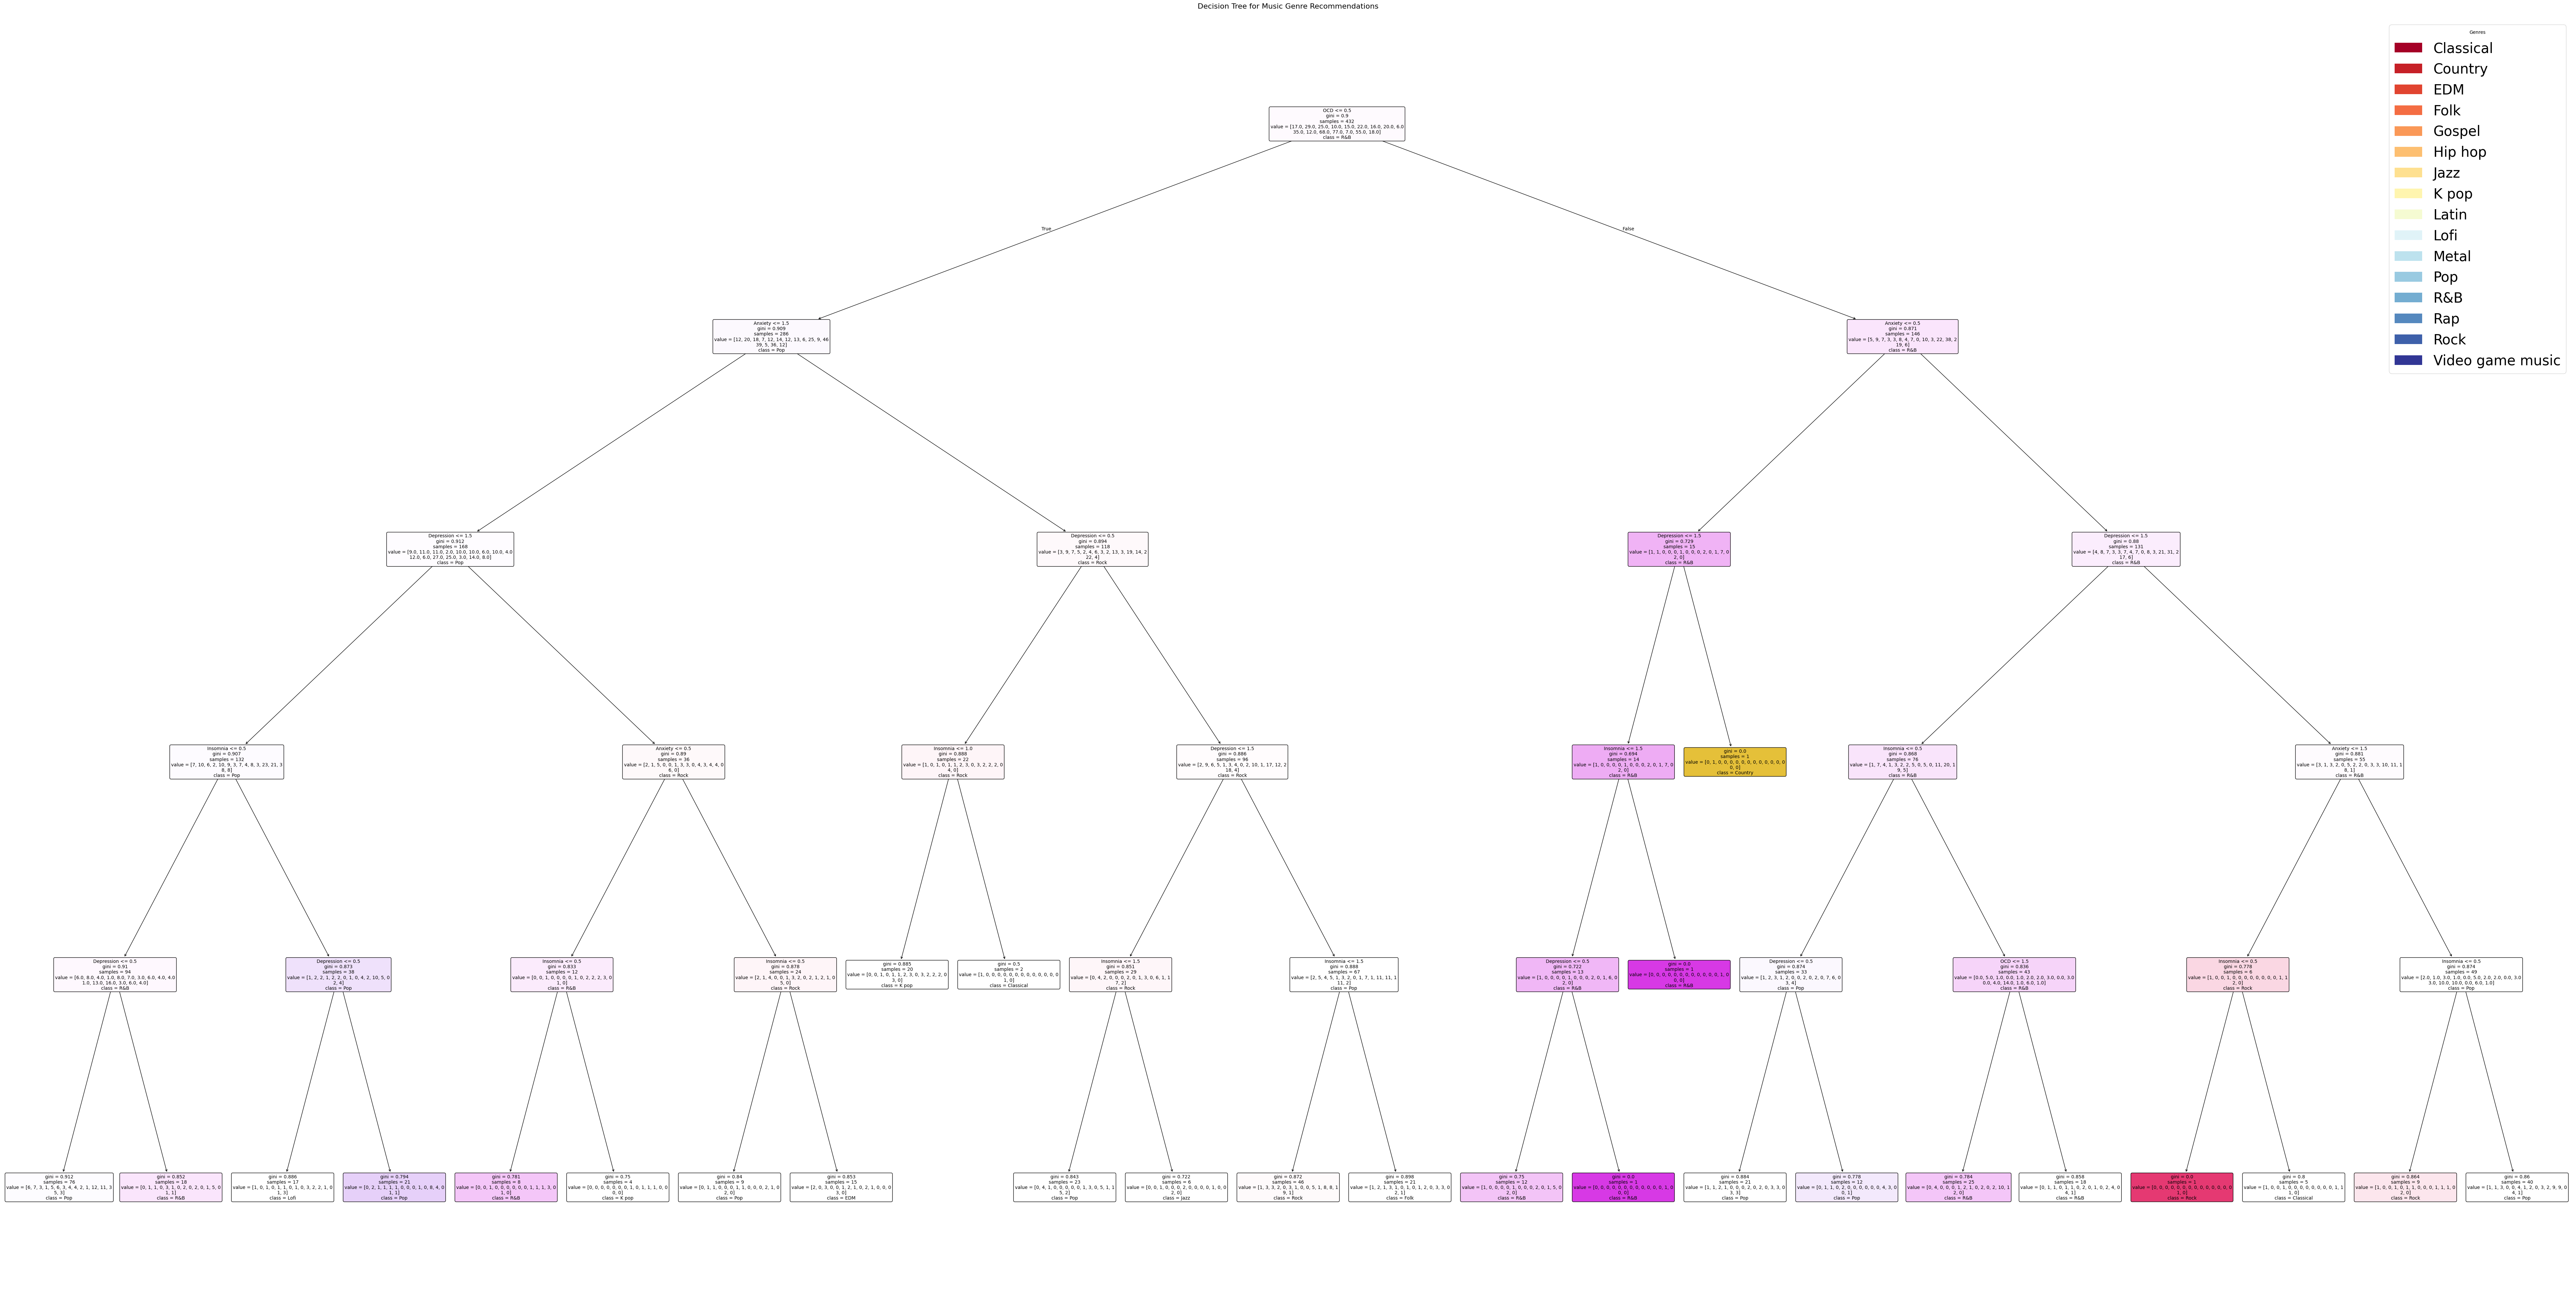

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 50))

# Create the tree visualization
plot_tree(model, 
        feature_names=health_columns,
        class_names=genre_columns,
        filled=True,
        rounded=True,
        fontsize=10,
        max_depth=5)

    
plt.title("Decision Tree for Music Genre Recommendations", pad=20, fontsize=16)
    
# Add legend
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(genre_columns)))
patches = [plt.Rectangle((0,0),1,1, facecolor=color) for color in colors]
plt.legend(patches, genre_columns, title="Genres", 
        loc="upper right", bbox_to_anchor=(1, 1), prop={'size':30})
plt.show()

### Insights and Conclusions

At this point we have completed the ML-based exploration and analysis of our dataset. Looking at our model's classification report and some sample tests, it seems as if the model may not have performed as well as we inititally expected. Coming into this project, we believed music and mental health would be more closely related to each other, but seeing these results, it seems as if we were mistaken. While it appears there small association, at the end of the day, a person's music preference is very dependent on the person themselves and their personalities. The current state of one's mental health plays less of a role in their music taste than we initially expected. 

This project was very insightful for us and gave us the opportunity to somewhat disprove a preconceived notion we may have had before taking on this challenge. 

### ***Model Performance***

![Model Performance](MODEL_PERFORMANCE.png)

### ***Insights***

![Model Performance](INSIGHTS.png)

![Thank You](THANKS.png)